In [161]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## IMPORTS

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## READING FILE

In [163]:
data = pd.read_excel('data\FinalData.xlsx')

In [164]:
data.head()

,Unnamed: 0,,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Result,Type
0,0,1.0,94.253,131.665,16.063,131.665,16.063,36.778,125.929,10.210,11.487,11.487,no,no
1,1,2.0,89.140,233.030,16.700,233.030,16.700,36.498,227.821,11.061,10.636,11.487,no,no
2,2,3.0,90.905,156.462,17.018,156.462,17.018,35.471,151.242,11.274,10.636,11.274,no,no
3,3,4.0,79.683,207.517,16.666,207.517,16.666,33.718,202.295,11.274,10.210,10.636,yes,small
4,4,5.0,86.742,80.870,17.584,80.870,17.584,35.170,75.515,11.912,10.849,10.849,no,no


## DROPPING UNWANTED COLUMNS

In [165]:
data.drop(columns=['Unnamed: 0',' ','X','Y','XM','YM','BX','BY'],inplace=True)

In [166]:
data.head()

,Area,Perim.,Width,Height,Result,Type
0,94.253,36.778,11.487,11.487,no,no
1,89.140,36.498,10.636,11.487,no,no
2,90.905,35.471,10.636,11.274,no,no
3,79.683,33.718,10.210,10.636,yes,small
4,86.742,35.170,10.849,10.849,no,no


## CLEANING FEATURE

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    500 non-null    float64
 1   Perim.  500 non-null    float64
 2   Width   500 non-null    float64
 3   Height  500 non-null    float64
 4   Result  500 non-null    object 
 5   Type    496 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.6+ KB


### `AREA FEATURE`

checking NULL

In [168]:
data['Area'].isnull().sum()

0

ROUNDING DECIMALS

In [169]:
data['Area'].head()

0    94.253
1    89.140
2    90.905
3    79.683
4    86.742
Name: Area, dtype: float64

In [170]:
data['Area'] =  np.round(data['Area'],1)

In [171]:
data['Area'].head()

0    94.3
1    89.1
2    90.9
3    79.7
4    86.7
Name: Area, dtype: float64

### `PERIMETER FEATURE`

checking NULL

In [172]:
data['Perim.'].isnull().sum()

0

ROUNDING DECIMALS

In [173]:
data['Perim.'].head()

0    36.778
1    36.498
2    35.471
3    33.718
4    35.170
Name: Perim., dtype: float64

In [174]:
data['Perim.'] = np.round(data['Perim.'],1)

In [175]:
data.head()

,Area,Perim.,Width,Height,Result,Type
0,94.3,36.8,11.487,11.487,no,no
1,89.1,36.5,10.636,11.487,no,no
2,90.9,35.5,10.636,11.274,no,no
3,79.7,33.7,10.210,10.636,yes,small
4,86.7,35.2,10.849,10.849,no,no


renaming feature

In [176]:
data.rename(columns={'Perim.':'Perimeter'},inplace=True)

In [177]:
data.head()

,Area,Perimeter,Width,Height,Result,Type
0,94.3,36.8,11.487,11.487,no,no
1,89.1,36.5,10.636,11.487,no,no
2,90.9,35.5,10.636,11.274,no,no
3,79.7,33.7,10.210,10.636,yes,small
4,86.7,35.2,10.849,10.849,no,no


### `WIDTH AND HEIGHT FEATURE`

Checking NULL

In [178]:
print(data['Width'].isnull().sum())
print(data['Height'].isnull().sum())

0
0


ROUNDING DECIMALS

In [179]:
data[['Width','Height']].head()

,Width,Height
0,11.487,11.487
1,10.636,11.487
2,10.636,11.274
3,10.210,10.636
4,10.849,10.849


In [180]:
data['Width'] = np.round(data['Width'],1)
data['Height'] = np.round(data['Height'],1)

In [181]:
data[['Width','Height']].head()

,Width,Height
0,11.5,11.5
1,10.6,11.5
2,10.6,11.3
3,10.2,10.6
4,10.8,10.8


### `RESULT FEATURE`

checking unique

In [182]:
data['Result'].unique()

array(['no', 'yes', 'Yes', 'No', 'YES', 'NO'], dtype=object)

checking NULL

In [183]:
data['Result'].isnull().sum()

0

lowering case for all

In [184]:
data['Result'] = data['Result'].str.lower()

In [185]:
data['Result'].unique()

array(['no', 'yes'], dtype=object)

### `TYPE FEATURE`

In [186]:
data['Type'].unique()

array(['no', 'small', 'moderate', 'large', 'Small', ' no', 'SMALL',
       'Moderate', 'MODERATE', 'Large', nan], dtype=object)

In [187]:
data['Type'] = data['Type'].str.lower()

In [188]:
data['Type'] = data['Type'].str.replace(' no','no')

In [189]:
data['Type'].unique()

array(['no', 'small', 'moderate', 'large', nan], dtype=object)

CHECKING NULL

In [190]:
data['Type'].isnull().sum()

4

In [191]:
data[data['Type'].isnull()]

,Area,Perimeter,Width,Height,Result,Type
321,71.3,36.0,11.3,9.5,no,NaN
416,72.6,36.3,9.6,9.9,no,NaN
422,80.4,36.8,10.3,10.3,no,NaN
484,74.9,34.9,9.9,10.1,no,NaN


FILLING NULL VALUES

In [192]:
data['Type'] = data['Type'].fillna('no')

In [193]:
data['Type'].isnull().sum()

0

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       500 non-null    float64
 1   Perimeter  500 non-null    float64
 2   Width      500 non-null    float64
 3   Height     500 non-null    float64
 4   Result     500 non-null    object 
 5   Type       500 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.6+ KB


# `CLEANED DATA`

In [195]:
data.head()

,Area,Perimeter,Width,Height,Result,Type
0,94.3,36.8,11.5,11.5,no,no
1,89.1,36.5,10.6,11.5,no,no
2,90.9,35.5,10.6,11.3,no,no
3,79.7,33.7,10.2,10.6,yes,small
4,86.7,35.2,10.8,10.8,no,no


saveing Cleaned data

In [196]:
data.to_excel('CLEANED_DATA.xlsx',index=False)

# `PLOTTING GRAPHS` 

In [197]:
plot = pd.read_excel('CLEANED_DATA.xlsx')

##### `PLOTTING NUMERICAL FEATURES`

In [198]:
numerical_features = plot.columns[plot.dtypes != 'O']

In [199]:
plot[numerical_features].head()

,Area,Perimeter,Width,Height
0,94.3,36.8,11.5,11.5
1,89.1,36.5,10.6,11.5
2,90.9,35.5,10.6,11.3
3,79.7,33.7,10.2,10.6
4,86.7,35.2,10.8,10.8


## AREA

Maximum Area of Seed ---> 116.0 mm²
Minimum Area of Seed ---> 62.2 mm²


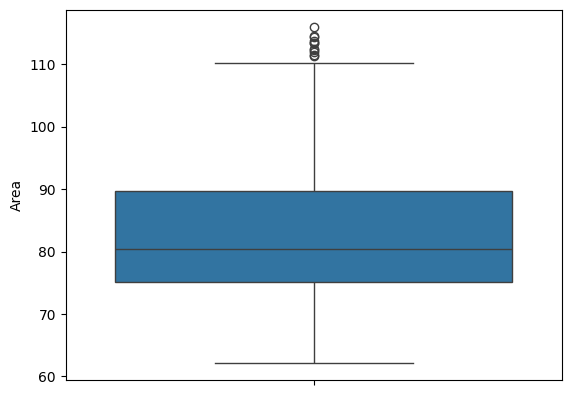

In [200]:
sns.boxplot(plot['Area'])
print('Maximum Area of Seed --->',plot['Area'].max(),'mm²')
print('Minimum Area of Seed --->',plot['Area'].min(),'mm²')

## PERIMETER

Maximum Perimeter of Seed ---> 46.6 mm²
Minimum Perimeter of Seed ---> 29.8 mm²


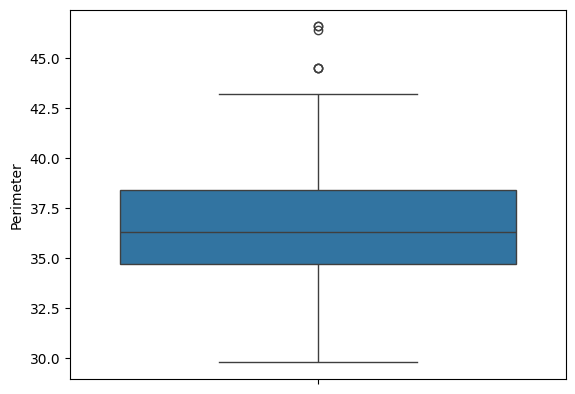

In [201]:
sns.boxplot(plot['Perimeter'])
print('Maximum Perimeter of Seed --->',plot['Perimeter'].max(),'mm²')
print('Minimum Perimeter of Seed --->',plot['Perimeter'].min(),'mm²')

## WIDTH

Maximum Area of Seed ---> 13.5 mm²
Minimum Area of Seed ---> 8.7 mm²


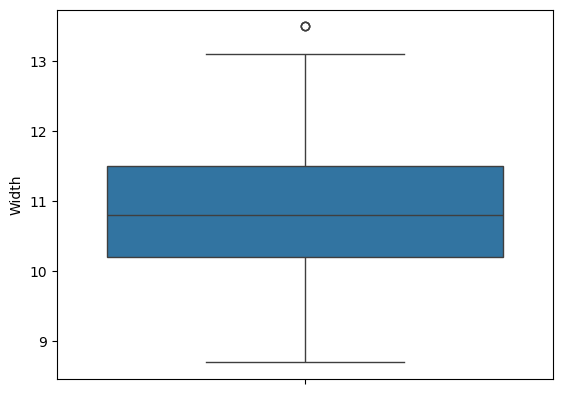

In [202]:
sns.boxplot(plot['Width'])
print('Maximum Area of Seed --->',plot['Width'].max(),'mm²')
print('Minimum Area of Seed --->',plot['Width'].min(),'mm²')

## HEIGHT

Maximum Area of Seed ---> 12.4 mm²
Minimum Area of Seed ---> 8.7 mm²


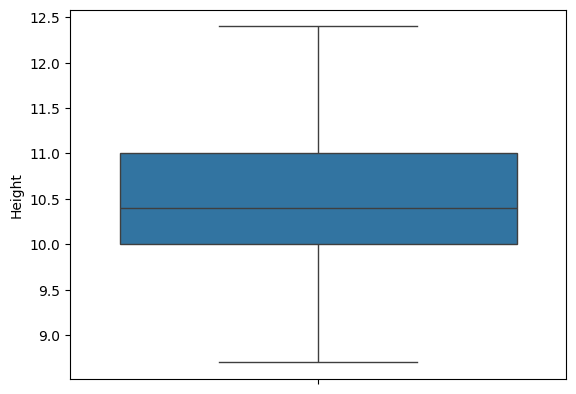

In [203]:
sns.boxplot(plot['Height'])
print('Maximum Area of Seed --->',plot['Height'].max(),'mm²')
print('Minimum Area of Seed --->',plot['Height'].min(),'mm²')

In [204]:
plot[plot['Area'] > 110][plot['Width'] >= 13][plot['Perimeter'] >= 42.5]

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_10096\1035923344.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot[plot['Area'] > 110][plot['Width'] >= 13][plot['Perimeter'] >= 42.5]
C:\Users\MAYUR\AppData\Local\Temp\ipykernel_10096\1035923344.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot[plot['Area'] > 110][plot['Width'] >= 13][plot['Perimeter'] >= 42.5]


,Area,Perimeter,Width,Height,Result,Type
131,113.8,42.7,13.5,11.2,no,no


## `HISTPLOTS`

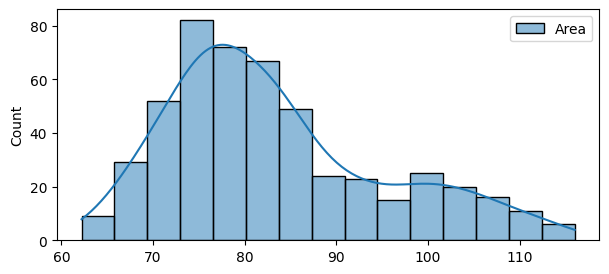

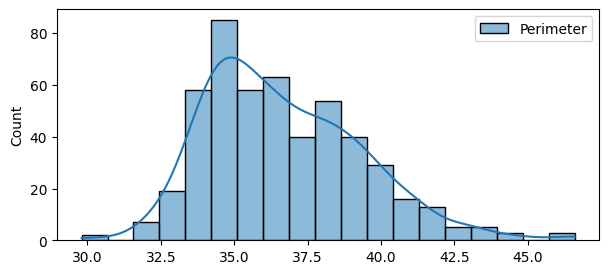

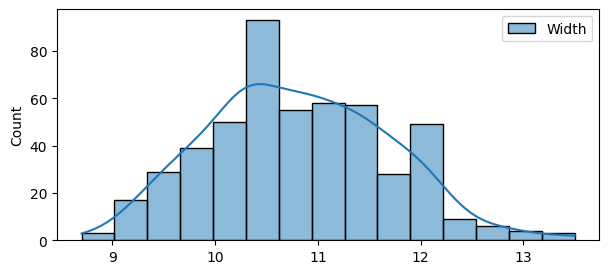

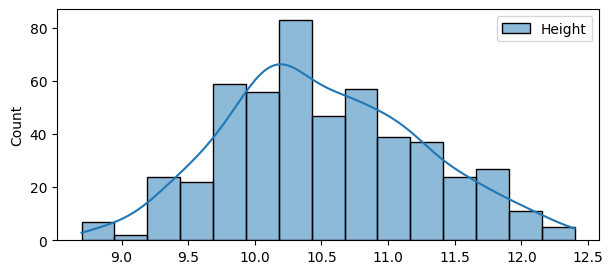

In [205]:
for i in numerical_features:
    plt.figure(figsize=(7,3))
    sns.histplot(plot[[i]],kde=True)

##### `PLOTTING CATEGORICAL FEATURES`

In [206]:
categorical_features = plot.columns[plot.dtypes == 'O']

In [207]:
plot[categorical_features].head()

,Result,Type
0,no,no
1,no,no
2,no,no
3,yes,small
4,no,no


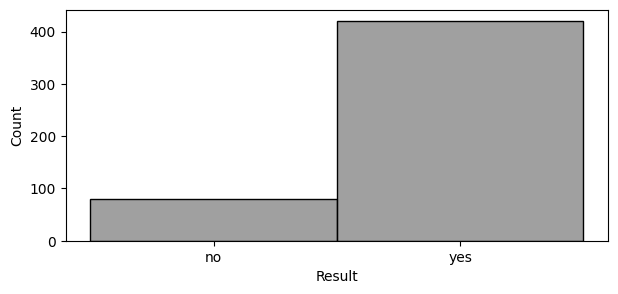

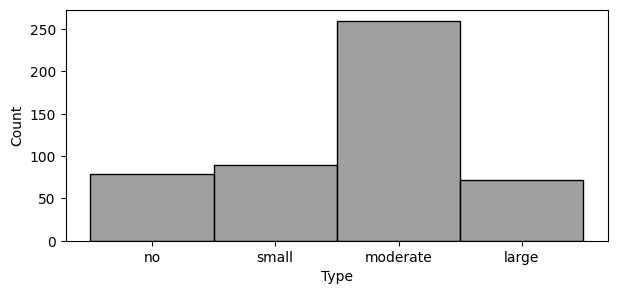

In [208]:
for i in categorical_features:
    plt.figure(figsize=(7,3))
    sns.histplot(plot[i],color='grey')

## PLOTTING INSIGHTS

In [209]:
yes_data = plot[plot['Result'] == 'yes']

In [210]:
no_data = plot[plot['Result'] == 'no']

## AREA of seed grown and not grown

<Axes: ylabel='Count'>

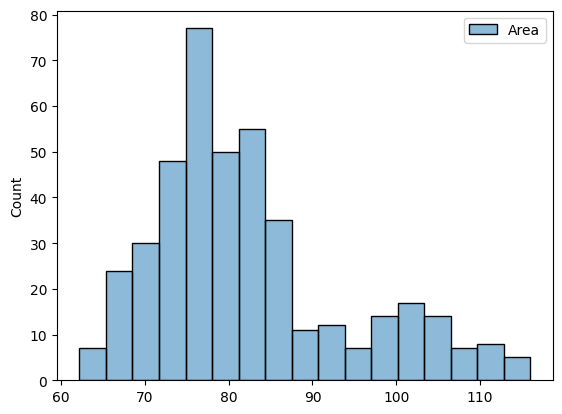

In [211]:
sns.histplot(yes_data[['Area']])

<Axes: ylabel='Count'>

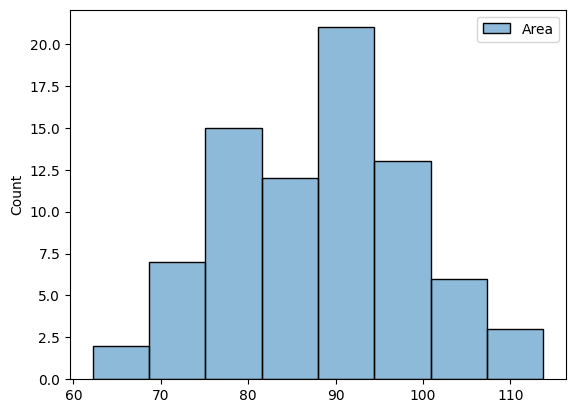

In [212]:
sns.histplot(no_data[['Area']])

##### `CONCLUSION` : **Area of Seed between 75mm² to 85mm² has Highest Probability to Grow** and **Area of Seed near 90mm² has Least Probability to Grow** 

<Axes: ylabel='count'>

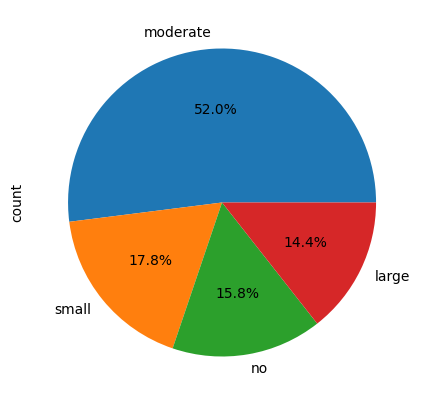

In [213]:
plot["Type"].value_counts().plot.pie(y=plot["Type"],figsize = (5,5),autopct='%1.1f%%')

# `Type of data `

In [214]:
small_type = data[data['Type'] == 'small']

In [215]:
moderate_type = data[data['Type'] == 'moderate']

In [216]:
large_type = data[data['Type'] == 'large']

In [217]:
no_type = data[data['Type'] == 'no']

In [218]:
small_type.shape

(89, 6)

In [219]:
moderate_type.shape

(260, 6)

In [220]:
large_type.shape

(72, 6)

In [221]:
no_type.shape

(79, 6)

In [222]:
## TOTAL DATA 
small_type.shape[0] + moderate_type.shape[0] + large_type.shape[0] + no_type.shape[0]

500

In [223]:
small_type.head()

,Area,Perimeter,Width,Height,Result,Type
3,79.7,33.7,10.2,10.6,yes,small
10,83.6,34.7,10.4,11.1,yes,small
17,78.5,33.6,10.4,10.4,yes,small
21,83.3,33.9,10.2,10.4,yes,small
25,91.7,37.4,10.8,11.7,yes,small


In [224]:
moderate_type.head()

,Area,Perimeter,Width,Height,Result,Type
20,87.4,36.4,10.6,11.1,yes,moderate
23,75.3,37.1,9.4,10.2,yes,moderate
24,92.3,35.8,11.3,10.8,yes,moderate
32,80.0,34.0,10.4,10.0,yes,moderate
39,85.7,34.8,11.3,10.0,yes,moderate


In [225]:
large_type.head()

,Area,Perimeter,Width,Height,Result,Type
30,80.0,40.4,11.7,10.4,yes,large
99,86.4,34.8,10.4,10.8,yes,large
117,98.6,37.2,11.5,11.2,yes,large
120,107.8,40.0,12.4,11.5,yes,large
126,104.9,38.6,11.9,11.5,yes,large


## `PLOTTING SMALL_TYPE RANGES `

In [226]:
small_numerical_features = small_type.columns[small_type.dtypes != 'O']

In [227]:
small_numerical_features

Index(['Area', 'Perimeter', 'Width', 'Height'], dtype='object')

Maximum Area of Seed ---> 116.0 mm²
Minimum Area of Seed ---> 64.2 mm²
Maximum Perimeter of Seed ---> 43.1 mm²
Minimum Perimeter of Seed ---> 32.6 mm²
Maximum Width of Seed ---> 13.5 mm²
Minimum Width of Seed ---> 9.1 mm²
Maximum Height of Seed ---> 12.4 mm²
Minimum Height of Seed ---> 9.3 mm²


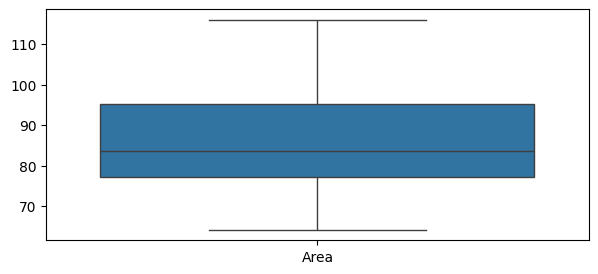

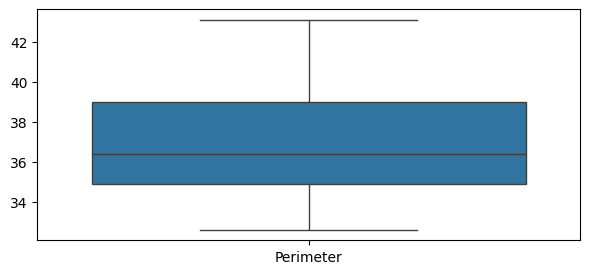

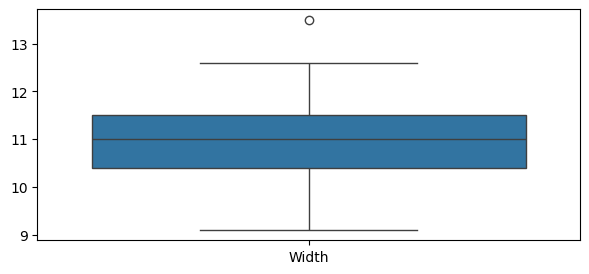

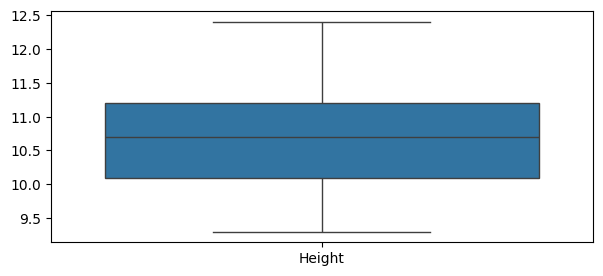

In [228]:
for i in small_numerical_features:
    plt.figure(figsize=(7,3))
    sns.boxplot(small_type[[i]])
    print(f'Maximum {i} of Seed --->',small_type[i].max(),'mm²')
    print(f'Minimum {i} of Seed --->',small_type[i].min(),'mm²')

## `PLOTTING moderate_TYPE RANGES `

In [229]:
moderate_numerical_features = moderate_type.columns[moderate_type.dtypes != 'O']

In [230]:
moderate_numerical_features

Index(['Area', 'Perimeter', 'Width', 'Height'], dtype='object')

Maximum Area of Seed ---> 113.4 mm²
Minimum Area of Seed ---> 63.0 mm²
Maximum Perimeter of Seed ---> 46.6 mm²
Minimum Perimeter of Seed ---> 30.4 mm²
Maximum Width of Seed ---> 13.5 mm²
Minimum Width of Seed ---> 9.1 mm²
Maximum Height of Seed ---> 12.4 mm²
Minimum Height of Seed ---> 8.7 mm²


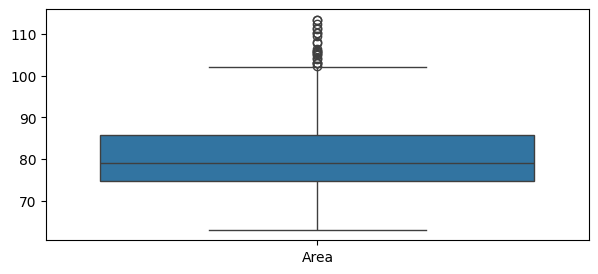

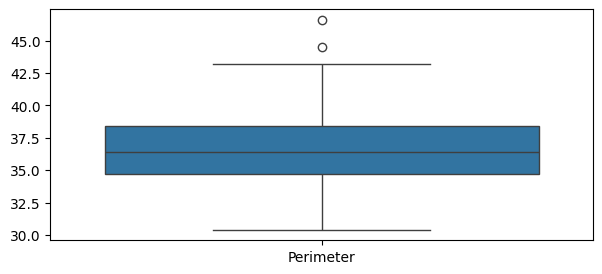

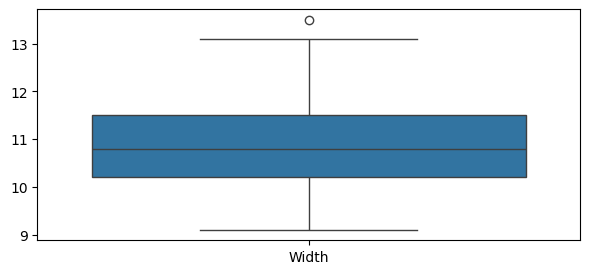

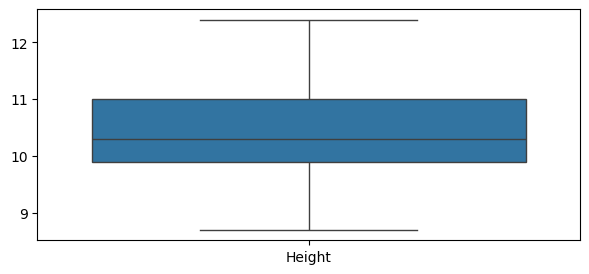

In [231]:
for i in moderate_numerical_features:
    plt.figure(figsize=(7,3))
    sns.boxplot(moderate_type[[i]])
    print(f'Maximum {i} of Seed --->',moderate_type[i].max(),'mm²')
    print(f'Minimum {i} of Seed --->',moderate_type[i].min(),'mm²')

## `PLOTTING large_TYPE RANGES `

In [232]:
large_numerical_features = large_type.columns[large_type.dtypes != 'O']

In [233]:
large_numerical_features

Index(['Area', 'Perimeter', 'Width', 'Height'], dtype='object')

Maximum Area of Seed ---> 110.2 mm²
Minimum Area of Seed ---> 62.2 mm²
Maximum Perimeter of Seed ---> 46.6 mm²
Minimum Perimeter of Seed ---> 32.2 mm²
Maximum Width of Seed ---> 13.1 mm²
Minimum Width of Seed ---> 8.8 mm²
Maximum Height of Seed ---> 12.1 mm²
Minimum Height of Seed ---> 8.9 mm²


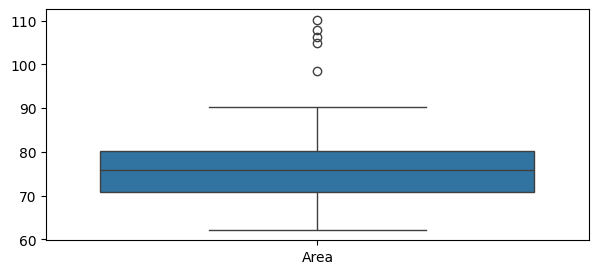

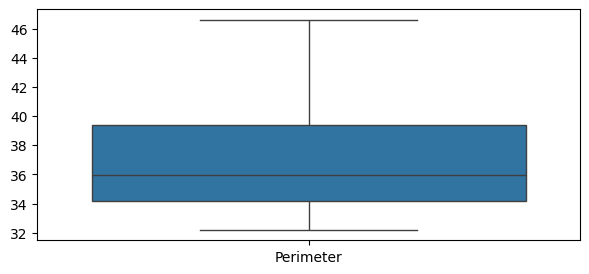

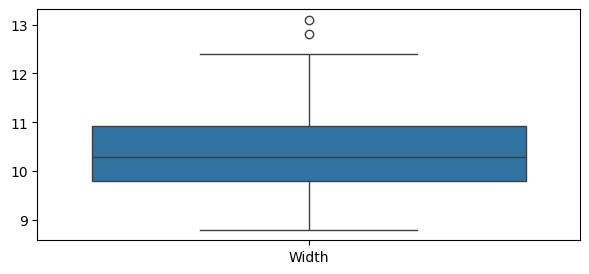

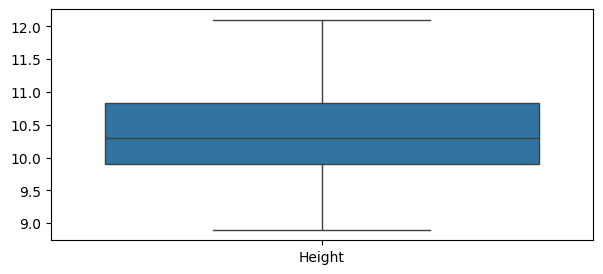

In [234]:
for i in large_numerical_features:
    plt.figure(figsize=(7,3))
    sns.boxplot(large_type[[i]])
    print(f'Maximum {i} of Seed --->',large_type[i].max(),'mm²')
    print(f'Minimum {i} of Seed --->',large_type[i].min(),'mm²')

## `PLOTTING no_TYPE RANGES `

In [235]:
no_numerical_features = no_type.columns[no_type.dtypes != 'O']

In [236]:
no_numerical_features

Index(['Area', 'Perimeter', 'Width', 'Height'], dtype='object')

Maximum Area of Seed ---> 113.8 mm²
Minimum Area of Seed ---> 62.2 mm²
Maximum Perimeter of Seed ---> 42.7 mm²
Minimum Perimeter of Seed ---> 29.8 mm²
Maximum Width of Seed ---> 13.5 mm²
Minimum Width of Seed ---> 8.7 mm²
Maximum Height of Seed ---> 12.1 mm²
Minimum Height of Seed ---> 8.9 mm²


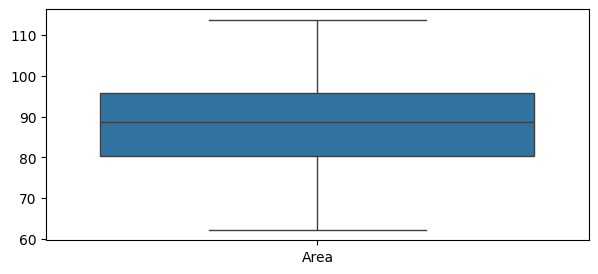

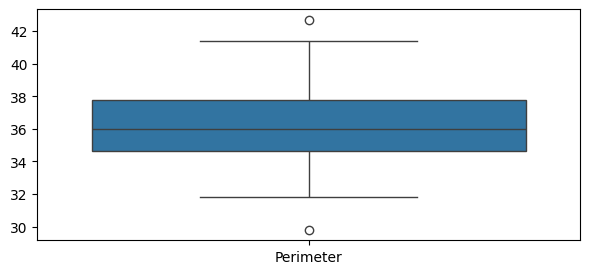

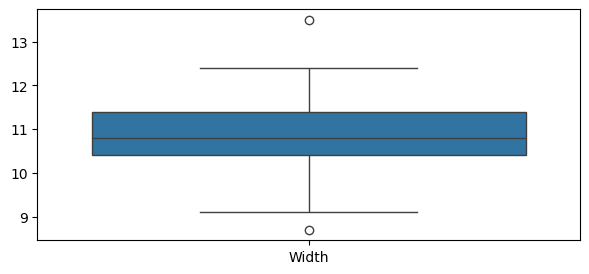

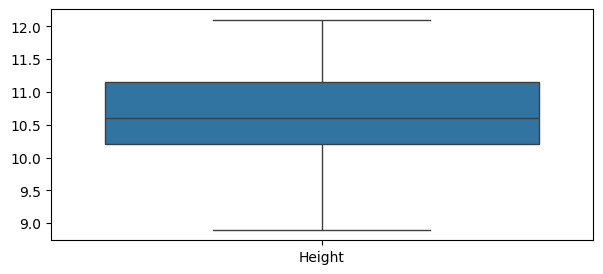

In [237]:
for i in no_numerical_features:
    plt.figure(figsize=(7,3))
    sns.boxplot(no_type[[i]])
    print(f'Maximum {i} of Seed --->',no_type[i].max(),'mm²')
    print(f'Minimum {i} of Seed --->',no_type[i].min(),'mm²')